# Twitter datasets analysis

## Imports and configs

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import logging
import matplotlib.pyplot as plt
import seaborn as sns

import helper
from config import Config
from stages import PreProcessing, CommunityDetection, Metrics, Analysis, Comparisons

logging.basicConfig(filename='logs/debug.log', filemode='w', level=logging.DEBUG,
                    format='%(levelname)s - %(name)s - %(message)s')

DEMON parameters:
* *epsilon*: the tolerance required in order to merge communities
* *min_community_size*: minimum number of nodes needed to form a community

In [2]:
data_filenames = ['ll', 'kdd', 'pr']
epsilon = [0.25, 0.5, 0.75]
min_community_size = 3

configs = {}
for data_fn in data_filenames:
    configs[data_fn] = []
    for e in epsilon:
        config = Config(
            data_filename=data_fn,
            demon={
                'epsilon': e,
                'min_community_size': min_community_size
            })
        configs[data_fn].append(config)

## Stages

### 1. Pre Processing

In [3]:
for data_fn, config in configs.items():
    pp = PreProcessing(config[0]) # only once per dataset, same for all the cd parameters
    pp.execute()
    pp.save()

### 2. Community Detection

In [4]:
for data_fn, config in configs.items():
    print(data_fn)
    for c in config:
        print(f'compute DEMON community detection for '
              f'e:{c.demon["epsilon"]} mcs:{c.demon["min_community_size"]}')
        cd = CommunityDetection(c)
        cd.execute()
        cd.save()

ll
compute DEMON community detection for e:0.25 mcs:3
compute DEMON community detection for e:0.5 mcs:3
compute DEMON community detection for e:0.75 mcs:3
kdd
compute DEMON community detection for e:0.25 mcs:3
compute DEMON community detection for e:0.5 mcs:3
compute DEMON community detection for e:0.75 mcs:3
pr
compute DEMON community detection for e:0.25 mcs:3
compute DEMON community detection for e:0.5 mcs:3
compute DEMON community detection for e:0.75 mcs:3


### 3. Metrics

In [5]:
m = {}
for data_fn, config in configs.items():
    m[data_fn] = {}
    print(data_fn)
    for c in config:
        m[data_fn][c.demon['epsilon']] = Metrics(c)
        m[data_fn][c.demon['epsilon']].execute()
        m[data_fn][c.demon['epsilon']].save()

ll
get community subgraphs for e:0.25 mcs:3



get pquality for e:0.25 mcs:3



get community subgraphs for e:0.5 mcs:3



get pquality for e:0.5 mcs:3



get community subgraphs for e:0.75 mcs:3



get pquality for e:0.75 mcs:3



kdd
get community subgraphs for e:0.25 mcs:3



get pquality for e:0.25 mcs:3



get community subgraphs for e:0.5 mcs:3



get pquality for e:0.5 mcs:3



get community subgraphs for e:0.75 mcs:3



get pquality for e:0.75 mcs:3



pr
get community subgraphs for e:0.25 mcs:3



get pquality for e:0.25 mcs:3



get community subgraphs for e:0.5 mcs:3



get pquality for e:0.5 mcs:3



get community subgraphs for e:0.75 mcs:3



get pquality for e:0.75 mcs:3


## Analysis

In [6]:
e_pairwise_combs = helper.pairwise_combinations(sorted(epsilon, reverse=True))
e_pairs = [(e,e) for e in epsilon]
metric_name = 'indegree'

### Graph metrics
Graph analysis.

In [7]:
for data_fn, m_list in m.items():
    print(f'Metrics for {data_fn}')
    metric_element = list(m_list.values())[0]
    display(Metrics.graph_info(metric_element.g))

Metrics for ll


# nodes  # edges  avg degree  avg weighted degree  density  connected  \
0     5998   105479     35.1714              49.7546   0.0029      False   

   strongly conn components  avg clustering  assortativity  
0                         3          0.4567        -0.2026

Metrics for kdd


# nodes  # edges  avg degree  avg weighted degree  density  connected  \
0      103      453      8.7961              10.2136   0.0431      False   

   strongly conn components  avg clustering  assortativity  
0                         5          0.6281        -0.3198

Metrics for pr


# nodes  # edges  avg degree  avg weighted degree  density  connected  \
0    21801   499186     45.7948              66.8714   0.0011      False   

   strongly conn components  avg clustering  assortativity  
0                        18          0.2679        -0.2515

* *# nodes*: number of users.
* *# edges*: number of relations between users.
* *avg degree*: average number of edges per node.
* *avg degree*: average weigth sum per node.
* *density*: expresses the how sparse is the adjacency matrix (i.e. how likely that a node has edges). 0 for a graph without edges and 1 for a complete graph.

\begin{align}
&\begin{aligned}
d = \frac{m}{n(n-1)}
\end{aligned}\\
&\begin{aligned}
m = \text{# edges}
\end{aligned}\\
&\begin{aligned}
n = \text{# nodes}
\end{aligned}
\end{align}

* *connected*: for each pairs of nodes exists a path that connects them.
* *strongly connected components*: group of nodes for which for each pair of nodes exists a path that connects them. Can be broadly relatable to the concept of community.
* *avg clustering*: average for each node of the fraction of possible triangles through that node that exist.
* *assortativity*: measures how much nodes are likely to connect to nodes with the same degree (>0) or with a different degree (<0).

/home/flaprimo/twitter-network-analysis/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


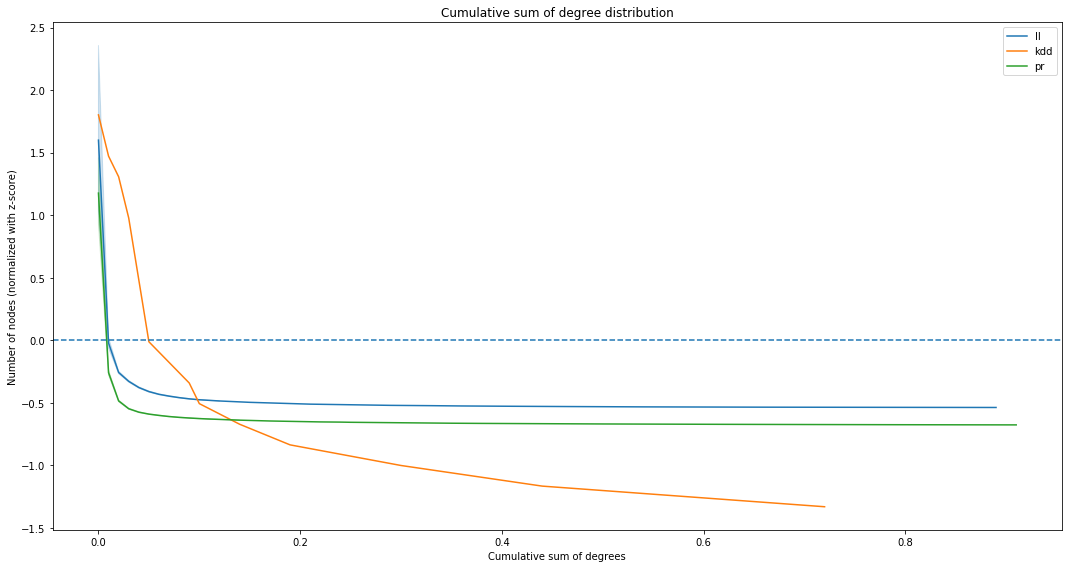

In [8]:
Analysis.plot_compare_cumsum_deg_dist(m)

Cumulative sum of degree distribution shows how the degree is distributed with respect to the number of nodes.

* Nodes with a lower degree (left on the plot) are typically way less than the ones with a high degree (right on the plot).

* Over the dotted line there's a number of node above the mean (the converse below the line) as per z-score.

* Z-score normalization for the number of nodes has been chosen because it preserves the range (maximum and minimum) and introduces the dispersion of the serie (standard deviation / variance)

\begin{align}
P(k) = \frac{\text{# nodes with degree >= k}}{\text{# nodes}}
\end{align}

Cumulative sum of degree distribution is more robust wrt the simple degree distribution because is less subject to small numbers. 

### Communities
Found communities per epsilon parameter.

In [9]:
for data_fn, m_list in m.items():
    print(f'Communities found in {data_fn}')
    display(Analysis.number_of_communities(m_list))

Communities found in ll


epsilon  # communities  # nodes  # edges
0     0.25             14     5998   105479
1     0.50             23     5997   105467
2     0.75             50     5997   105467

Communities found in kdd


epsilon  # communities  # nodes  # edges
0     0.25             11      103      453
1     0.50             12      103      453
2     0.75             14      103      453

Communities found in pr


epsilon  # communities  # nodes  # edges
0     0.25             98    21801   499186
1     0.50            253    21801   499186
2     0.75            627    21800   499178

Network analysis per found communities

In [10]:
for data_fn, m_list in m.items():
    print(f'Metrics for {data_fn}')
    for e, m_element in m_list.items():
        print(e)
        display(Analysis.describe_communities(m_element).describe())

Metrics for ll
0.25


# nodes       # edges  avg degree  avg weighted degree    density  \
count    14.000000     14.000000   14.000000            14.000000  14.000000   
mean   1603.000000  38503.928571   30.998257            46.776271   0.256714   
std    1772.806641  40864.921268   22.507358            35.854333   0.324229   
min       4.000000     11.000000    5.500000             6.000000   0.005000   
25%      13.000000     64.250000    8.899975            10.138425   0.006675   
50%     936.000000  28207.000000   35.103450            61.804500   0.035300   
75%    3503.250000  82916.000000   46.412225            68.719850   0.431100   
max    4307.000000  92370.000000   65.922400           102.928700   0.916700   

       strongly conn components  avg clustering  assortativity  
count                      14.0       14.000000      14.000000  
mean                        1.0        0.513007      -0.360379  
std                         0.0        0.183445       0.218024  
min                         1.0        0.292800      -0.805200  
25%                         1.0        0.354650      -0.370775  
50%                         1.0        0.494100      -0.250300  
75%                         1.0        0.596275      -0.225975  
max                         1.0        0.833300      -0.182800

0.5


# nodes       # edges  avg degree  avg weighted degree    density  \
count    23.000000     23.000000   23.000000            23.000000  23.000000   
mean    980.695652  24564.608696   29.482870            46.120565   0.301270   
std    1426.114857  33950.491544   23.296297            39.059572   0.341586   
min       4.000000     10.000000    5.000000             5.000000   0.003600   
25%       7.500000     32.000000    7.333350             7.600000   0.023450   
50%     409.000000   6120.000000   29.926700            52.537900   0.041000   
75%    1499.500000  46654.000000   52.113150            83.472350   0.627750   
max    5253.000000  99388.000000   66.655100           114.244300   0.916700   

       strongly conn components  avg clustering  assortativity  
count                      23.0       23.000000      23.000000  
mean                        1.0        0.553265      -0.421200  
std                         0.0        0.222219       0.215598  
min                         1.0        0.267600      -0.909100  
25%                         1.0        0.355650      -0.601050  
50%                         1.0        0.481600      -0.292400  
75%                         1.0        0.800000      -0.262950  
max                         1.0        0.867000      -0.204100

0.75


# nodes       # edges  avg degree  avg weighted degree    density  \
count    50.000000     50.000000   50.000000            50.000000  50.000000   
mean    426.940000   9339.500000   25.529128            45.340972   0.230120   
std     755.569319  17786.914943   20.156631            36.593902   0.289256   
min       4.000000     10.000000    5.000000             5.000000   0.004800   
25%      12.250000     58.250000    9.227700            16.800000   0.045300   
50%     149.000000   1303.000000   18.029200            35.447550   0.066050   
75%     477.250000  10634.250000   34.733500            66.143600   0.392075   
max    4476.000000  95322.000000   76.384500           132.384500   0.916700   

       strongly conn components  avg clustering  assortativity  
count                      50.0       50.000000      50.000000  
mean                        1.0        0.574378      -0.472112  
std                         0.0        0.216920       0.190595  
min                         1.0        0.220100      -0.909100  
25%                         1.0        0.352125      -0.637725  
50%                         1.0        0.574750      -0.438050  
75%                         1.0        0.800000      -0.305400  
max                         1.0        0.911600      -0.212100

Metrics for kdd
0.25


# nodes     # edges  avg degree  avg weighted degree    density  \
count  11.000000   11.000000   11.000000            11.000000  11.000000   
mean   11.363636   46.363636    7.683891             9.351455   0.560245   
std     8.417514   37.675649    1.340562             1.999289   0.279870   
min     4.000000   11.000000    5.500000             6.000000   0.150600   
25%     5.500000   18.000000    6.566650             8.090900   0.321000   
50%     7.000000   27.000000    7.909100             9.176500   0.633300   
75%    15.000000   65.000000    8.700000            10.800000   0.800000   
max    30.000000  131.000000    9.400000            12.307700   0.916700   

       strongly conn components  avg clustering  assortativity  
count                      11.0       11.000000      11.000000  
mean                        1.0        0.704700      -0.374882  
std                         0.0        0.111656       0.183928  
min                         1.0        0.549000      -0.751000  
25%                         1.0        0.615750      -0.477050  
50%                         1.0        0.666700      -0.375000  
75%                         1.0        0.814000      -0.239100  
max                         1.0        0.850000      -0.133300

0.5


# nodes    # edges  avg degree  avg weighted degree    density  \
count  12.000000   12.00000   12.000000            12.000000  12.000000   
mean    9.000000   35.25000    7.411875             8.834983   0.634642   
std     6.714976   29.81496    1.259465             1.715924   0.238541   
min     4.000000   11.00000    5.500000             6.000000   0.188300   
25%     5.750000   17.75000    6.249975             8.000000   0.580550   
50%     6.000000   24.50000    7.690500             8.376600   0.666700   
75%     7.750000   33.50000    8.380950             9.783325   0.787525   
max    24.000000  104.00000    9.400000            12.000000   0.916700   

       strongly conn components  avg clustering  assortativity  
count                      12.0       12.000000      12.000000  
mean                        1.0        0.713017      -0.418400  
std                         0.0        0.108058       0.169776  
min                         1.0        0.549000      -0.751000  
25%                         1.0        0.614250      -0.510150  
50%                         1.0        0.738850      -0.444000  
75%                         1.0        0.807000      -0.288650  
max                         1.0        0.850000      -0.133300

0.75


# nodes    # edges  avg degree  avg weighted degree    density  \
count  14.00000  14.000000   14.000000            14.000000  14.000000   
mean    8.50000  33.500000    7.616507             8.949414   0.639707   
std     5.33133  22.816155    1.313235             1.602241   0.214606   
min     4.00000  11.000000    5.500000             6.000000   0.188300   
25%     6.00000  18.250000    6.449975             8.000000   0.601775   
50%     6.50000  26.500000    7.811700             8.685700   0.666700   
75%     8.00000  37.750000    8.446425             9.900000   0.762525   
max    22.00000  87.000000    9.750000            12.000000   0.916700   

       strongly conn components  avg clustering  assortativity  
count                      14.0       14.000000      14.000000  
mean                        1.0        0.693486      -0.410300  
std                         0.0        0.126453       0.181452  
min                         1.0        0.471400      -0.751000  
25%                         1.0        0.596850      -0.486225  
50%                         1.0        0.700000      -0.413650  
75%                         1.0        0.821000      -0.267750  
max                         1.0        0.850000      -0.133300

Metrics for pr
0.25


# nodes        # edges  avg degree  avg weighted degree  \
count     98.000000      98.000000   98.000000            98.000000   
mean    1400.744898   45823.612245   40.174932            69.860998   
std     2082.352220   72686.814011   27.079301            48.926827   
min        4.000000      10.000000    5.000000             5.000000   
25%        9.250000      41.250000    8.154750            10.750025   
50%      845.000000   19581.500000   45.864550            83.517400   
75%     1552.500000   51807.750000   63.126375           114.822400   
max    10249.000000  316395.000000   88.241700           150.900100   

         density  strongly conn components  avg clustering  assortativity  
count  98.000000                      98.0       98.000000      98.000000  
mean    0.235382                       1.0        0.414868      -0.341721  
std     0.321371                       0.0        0.260866       0.218128  
min     0.003000                       1.0        0.161200      -0.909100  
25%     0.020950                       1.0        0.217650      -0.546100  
50%     0.028950                       1.0        0.260300      -0.235100  
75%     0.541250                       1.0        0.672325      -0.178800  
max     1.250000                       1.0        1.000000      -0.112600

0.5


# nodes        # edges  avg degree  avg weighted degree  \
count    253.000000     253.000000  253.000000           253.000000   
mean     394.221344   11655.513834   18.766113            30.700460   
std     1330.275729   43666.182420   19.877929            33.677314   
min        4.000000      10.000000    5.000000             5.000000   
25%        6.000000      19.000000    6.333300             8.000000   
50%       21.000000     105.000000    9.294100            14.000000   
75%      211.000000    2459.000000   21.920500            39.431300   
max    11460.000000  362651.000000   86.301800           148.323200   

          density  strongly conn components  avg clustering  assortativity  
count  253.000000                     253.0      253.000000     253.000000  
mean     0.358234                       1.0        0.581754      -0.451250  
std      0.317874                       0.0        0.240616       0.213313  
min      0.002800                       1.0        0.150600      -0.955200  
25%      0.065900                       1.0        0.353000      -0.664600  
50%      0.231000                       1.0        0.632100      -0.406500  
75%      0.633300                       1.0        0.800000      -0.257300  
max      1.250000                       1.0        1.000000      -0.133500

0.75


# nodes        # edges  avg degree  avg weighted degree  \
count   627.000000     627.000000  627.000000           627.000000   
mean    159.779904    4623.110048   13.752342            24.423121   
std     686.600985   23046.515488   15.597465            28.161925   
min       4.000000      10.000000    5.000000             5.000000   
25%       6.000000      20.000000    6.400000             8.800000   
50%      11.000000      47.000000    8.181800            13.714300   
75%      40.500000     246.000000   12.832000            27.207800   
max    9724.000000  288325.000000   91.994200           155.605600   

          density  strongly conn components  avg clustering  assortativity  
count  627.000000                     627.0      627.000000     627.000000  
mean     0.416083                       1.0        0.656075      -0.510815  
std      0.276447                       0.0        0.190648       0.179408  
min      0.003000                       1.0        0.129100      -0.955200  
25%      0.166550                       1.0        0.565950      -0.666700  
50%      0.409100                       1.0        0.722200      -0.500000  
75%      0.633300                       1.0        0.800000      -0.375000  
max      1.250000                       1.0        1.000000      -0.085000

Size of found communities

ll


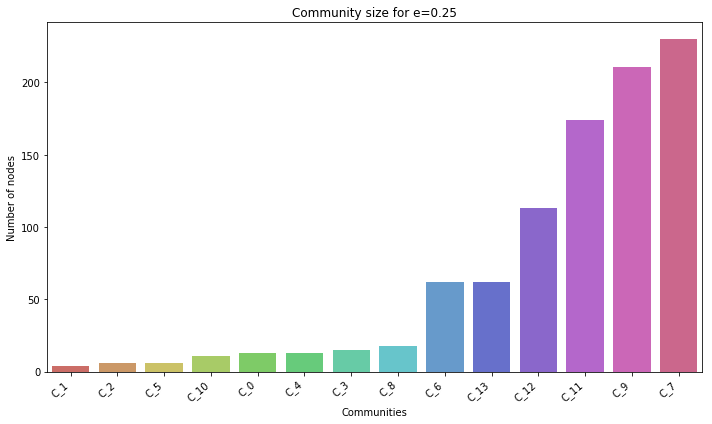

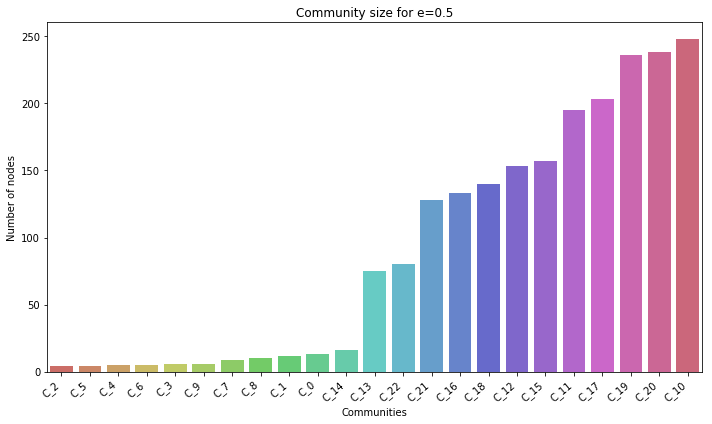

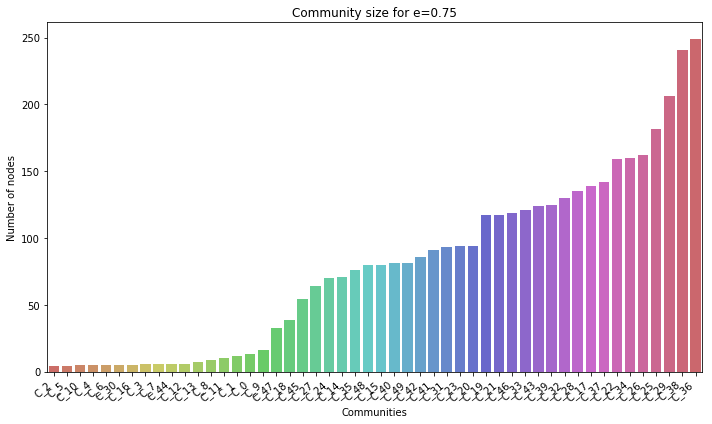

kdd


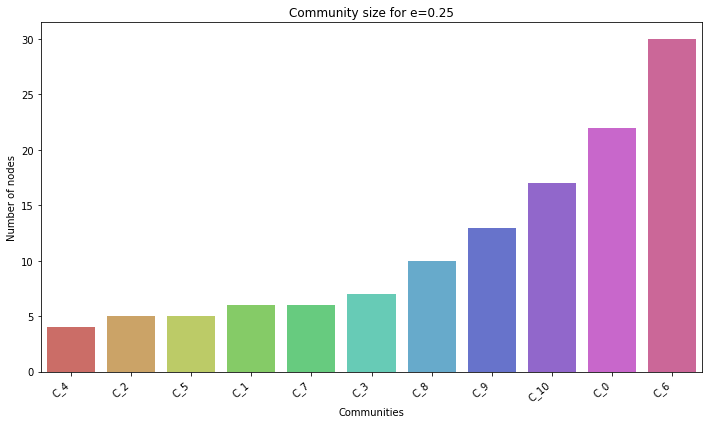

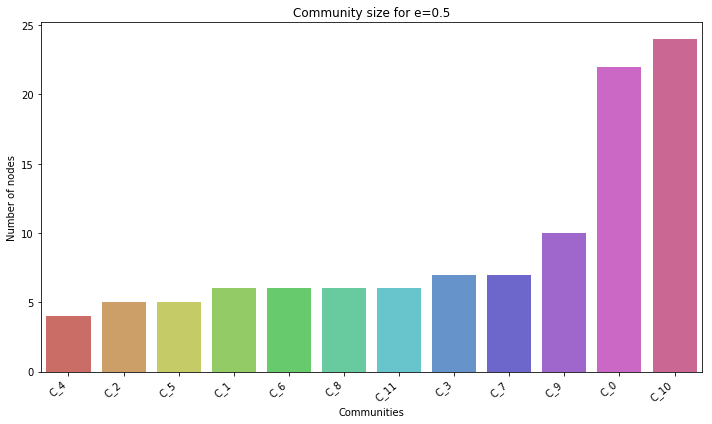

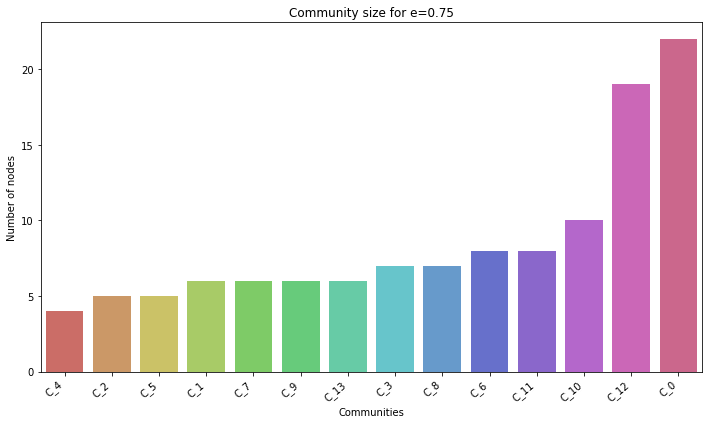

pr


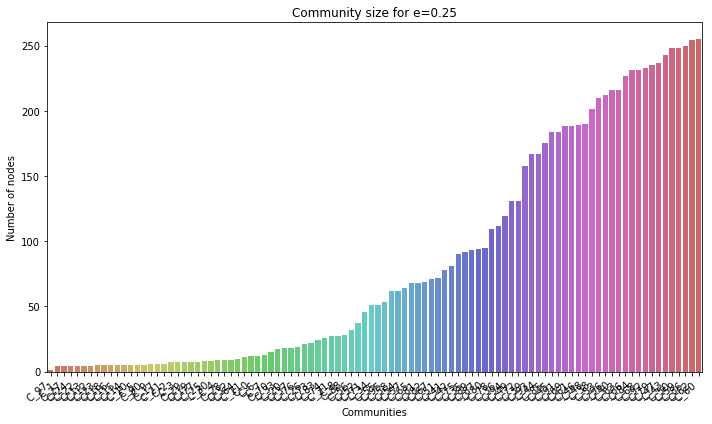

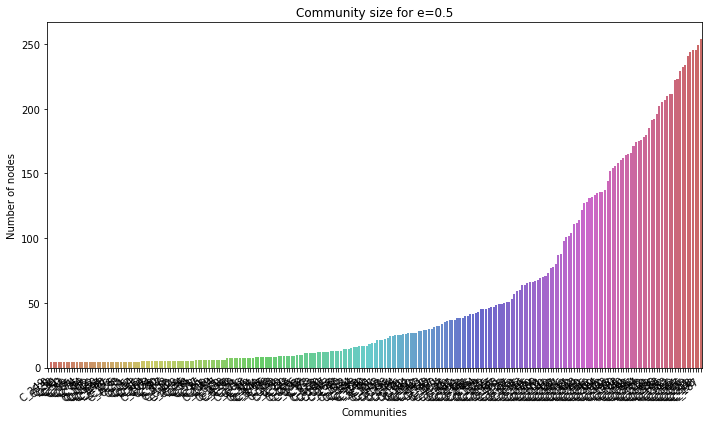

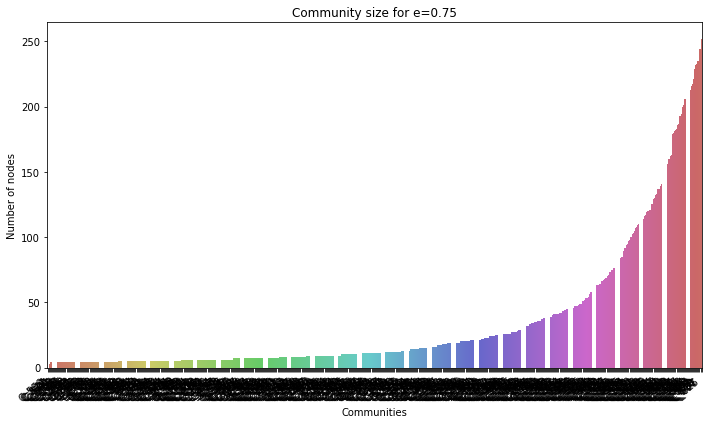

In [11]:
for data_fn, m_list in m.items():
    print(data_fn)
    for e, m_element in m_list.items():
        Analysis.plot_community_size(m_element)

### Communities quality parameters
Survey of modularity measures: https://github.com/Lab41/survey-community-detection 
* *Internal density*: number of edges (ms) in subset S divided by the total number of possible edges between all nodes (ns(ns-1)/2). Higher the better
* *Average degree*: average internal degree across all nodes (ns) in subset S. Higher the better.
* *FOMD (Fraction over median degree)*: Determines the number of nodes that have an internal degree greater than the median degree of nodes in Subset S. Higher the better.
* *Expansion*: can be thought as “External Degree”. Measure of separability. Lower the better.
* *Cut Ratio*: This metric is a measure of separability and can be thought of as "External Density". Lower the better.
* *Conductance*: Ratio of edges inside the cluster to the number of edges leaving the cluster (captures surface area to volume). Higher the better.
* *Normalized Cut*: Represents how well subset S is separated from graph G. Combines Conductance with the fraction of external edges over all non-community edges. Higher the better.
* *Maximum ODF (Out Degree Fraction)*: Fraction of external conections to internal connections for each node (ns) in S. It then returns the fraction with the highest value. Lower the better.
* *Average ODF*: same as Maximum ODF but takes the average. Lower the better.
* *Flake-ODF*: Fraction of the number of nodes that have fewer internal connections than external connections to the number of nodes (ns) in subset S. Higher the better.


In [12]:
for data_fn, m_list in m.items():
    print(f'Communities quality parameters found in {data_fn}')
    for e, pq in Analysis.pquality(m_list):
        print(f'pquality for e={e}')
        display(pq)

Communities quality parameters found in ll
pquality for e=0.25


min           max           avg           std
Index                                                             
Normalized Cut   0.00000      0.909682      0.250299      0.218403
Edges inside     0.00249      0.458333      0.128359      0.156209
Average Degree   5.50000     65.922403     30.998253     21.688622
FOMD             0.20000      0.500000      0.429297      0.096464
Expansion        0.00000    102.051095     10.839430     25.758139
Cut Ratio        0.00000      0.017829      0.002261      0.004459
Edges inside    11.00000  92370.000000  38503.928571  39378.423455
Conductance      0.00000      0.788862      0.143615      0.193842
Maximum-ODF      0.00000   8226.000000   2585.714286   2739.121534
Average-ODF      0.00000    204.102190     21.678860     51.516279
Flake-ODF        0.00000      0.332117      0.043056      0.089986

pquality for e=0.5


min           max           avg           std
Index                                                              
Normalized Cut   0.000000      0.987763      0.476902      0.333872
Edges inside     0.001801      0.458333      0.150635      0.167039
Average Degree   5.000000     66.655135     29.482877     22.784237
FOMD             0.166667      0.500000      0.429955      0.098052
Expansion        0.000000    163.080000     38.173983     49.672436
Cut Ratio        0.000000      0.027538      0.006866      0.008335
Edges inside    10.000000  99388.000000  24564.608696  33204.235765
Conductance      0.000000      0.959596      0.379907      0.340387
Maximum-ODF      0.000000   8546.000000   3621.652174   3339.995973
Average-ODF      0.000000    326.160000     76.347965     99.344872
Flake-ODF        0.000000      1.000000      0.166487      0.229573

pquality for e=0.75


min           max          avg           std
Index                                                             
Normalized Cut   0.000000      1.009813     0.707379      0.295473
Edges inside     0.002379      0.458333     0.115061      0.143176
Average Degree   5.000000     76.384466    25.529123     19.954046
FOMD             0.142857      0.500000     0.423333      0.090318
Expansion        0.000000    641.000000    84.144185     96.712266
Cut Ratio        0.000000      0.107012     0.014538      0.016090
Edges inside    10.000000  95322.000000  9339.500000  17608.147442
Conductance      0.000000      0.988980     0.626226      0.303244
Maximum-ODF      0.000000   8670.000000  5371.200000   3481.320991
Average-ODF      0.000000   1282.000000   168.288371    193.424532
Flake-ODF        0.000000      1.000000     0.367512      0.288568

Communities quality parameters found in kdd
pquality for e=0.25


min         max        avg        std
Index                                                      
Normalized Cut   0.000000    0.196296   0.077469   0.077624
Edges inside     0.075287    0.458333   0.280118   0.133422
Average Degree   5.500000    9.400000   7.683888   1.278169
FOMD             0.200000    0.500000   0.394897   0.094844
Expansion        0.000000    1.846154   0.610046   0.628429
Cut Ratio        0.000000    0.020513   0.007074   0.007357
Edges inside    11.000000  131.000000  46.363636  35.922322
Conductance      0.000000    0.166667   0.064546   0.064293
Maximum-ODF      0.000000   30.000000   8.181818   9.665479
Average-ODF      0.000000    3.692308   1.220091   1.256858
Flake-ODF        0.000000    0.153846   0.034874   0.052779

pquality for e=0.5


min         max        avg        std
Index                                                      
Normalized Cut   0.000000    0.366827   0.098976   0.113437
Edges inside     0.094156    0.458333   0.317317   0.114187
Average Degree   5.500000    9.400000   7.411869   1.205837
FOMD             0.166667    0.500000   0.386039   0.118012
Expansion        0.000000    3.166667   0.842343   1.014667
Cut Ratio        0.000000    0.032646   0.008895   0.010432
Edges inside    11.000000  104.000000  35.250000  28.545651
Conductance      0.000000    0.345455   0.090808   0.106959
Maximum-ODF      0.000000   20.000000   7.500000   7.444237
Average-ODF      0.000000    6.333333   1.684686   2.029333
Flake-ODF        0.000000    0.333333   0.072736   0.115772

pquality for e=0.75


min        max        avg        std
Index                                                     
Normalized Cut   0.000000   0.366827   0.112862   0.110494
Edges inside     0.094156   0.458333   0.319854   0.103391
Average Degree   5.500000   9.750000   7.616501   1.265460
FOMD             0.166667   0.500000   0.389161   0.114925
Expansion        0.000000   3.166667   0.990492   1.009729
Cut Ratio        0.000000   0.032646   0.010463   0.010438
Edges inside    11.000000  87.000000  33.500000  21.986197
Conductance      0.000000   0.345455   0.103214   0.103432
Maximum-ODF      0.000000  28.000000   9.000000   8.676734
Average-ODF      0.000000   6.333333   1.980984   2.019458
Flake-ODF        0.000000   0.333333   0.075817   0.109811

Communities quality parameters found in pr
pquality for e=0.25


min            max           avg           std
Index                                                               
Normalized Cut   0.000000       1.047534      0.552845      0.387230
Edges inside     0.001506       0.625000      0.117691      0.159866
Average Degree   5.000000      88.241750     40.174929     26.940784
FOMD             0.000000       0.500000      0.439387      0.093366
Expansion        0.000000     440.117647     96.869079    102.247665
Cut Ratio        0.000000       0.020235      0.004688      0.004795
Edges inside    10.000000  316395.000000  45823.612245  72315.012012
Conductance      0.000000       0.971436      0.449027      0.329941
Maximum-ODF      0.000000   10828.000000   6662.000000   4881.475070
Average-ODF      0.000000     880.235294    193.738157    204.495329
Flake-ODF        0.000000       0.618497      0.265381      0.211717

pquality for e=0.5


min            max           avg           std
Index                                                               
Normalized Cut   0.000000       1.042098      0.737711      0.312327
Edges inside     0.001381       0.625000      0.179119      0.158623
Average Degree   5.000000      86.301801     18.766112     19.838604
FOMD             0.000000       0.500000      0.415340      0.100985
Expansion        0.000000    1335.500000    127.854734    149.125463
Cut Ratio        0.000000       0.061270      0.005935      0.006872
Edges inside    10.000000  362651.000000  11655.513834  43579.800175
Conductance      0.000000       0.996270      0.706638      0.309347
Maximum-ODF      0.000000   10960.000000   4298.371542   4315.484059
Average-ODF      0.000000    2671.000000    255.709468    298.250926
Flake-ODF        0.000000       1.000000      0.446370      0.252501

pquality for e=0.75


min            max          avg           std
Index                                                              
Normalized Cut   0.000000       1.019268     0.832614      0.237175
Edges inside     0.001525       0.625000     0.208043      0.138115
Average Degree   5.000000      91.994241    13.752343     15.585020
FOMD             0.000000       0.500000     0.397620      0.103491
Expansion        0.000000    2061.000000   195.476187    236.828760
Cut Ratio        0.000000       0.094559     0.008993      0.010867
Edges inside    10.000000  288325.000000  4623.110048  23028.129753
Conductance      0.000000       0.997338     0.820631      0.241009
Maximum-ODF      0.000000   10966.000000  4093.585327   3999.367445
Average-ODF      0.000000    4122.000000   390.952374    473.657519
Flake-ODF        0.000000       1.000000     0.658991      0.281762

### Similarities
Detect similarities between communities of the same partition.
1. get the top 10 nodes in each community wrt the given metric ("indegree" in this case)
2. apply Kendall-Tau given a pair of top 10 ranked communities

Metrics:
* *Kendall Tau*: it takes values between ±1, with a positive correlation indicating that the ranks of
both variables increase together whilst a negative correlation indicates that as the rank of one variable increases the other one decreases.

  source: [2001 Blackwell Science Ltd, Journal of Clinical Nursing](http://www.blackwellpublishing.com/specialarticles/jcn_10_715.pdf)

\begin{align}
\tau = \frac{(\text{# of concordant pairs}) - (\text{# of disconcordant pairs})}
{N \cdot (N-1)/2}
\end{align}

 * *Indegree*: number of edges entering a node in a direct graph.

* *H-Index*: According to the definition of h-index on Wikipedia:
"A scientist has index h if h of his/her N papers have at least h citations each, and the other N − h papers have no more than h citations each."
For example, given citations = [3, 0, 6, 1, 5], which means the researcher has 5 papers in total and each of them had received 3, 0, 6, 1, 5 citations respectively.
Since the researcher has 3 papers with at least 3 citations each and the remaining two with no more than 3 citations each, his h-index is 3.

  Note: If there are several possible values for h, the maximum one is taken as the h-index.

  source: [Leetcode's Github](https://github.com/kamyu104/LeetCode/blob/master/Python/h-index.py)

#### Similarities between SAME epsilon settings
Find similarities between communities of the same partition settings (since we are using overlapping commmunities detection).

heatmaps for dataset ll


/home/flaprimo/twitter-network-analysis/venv/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


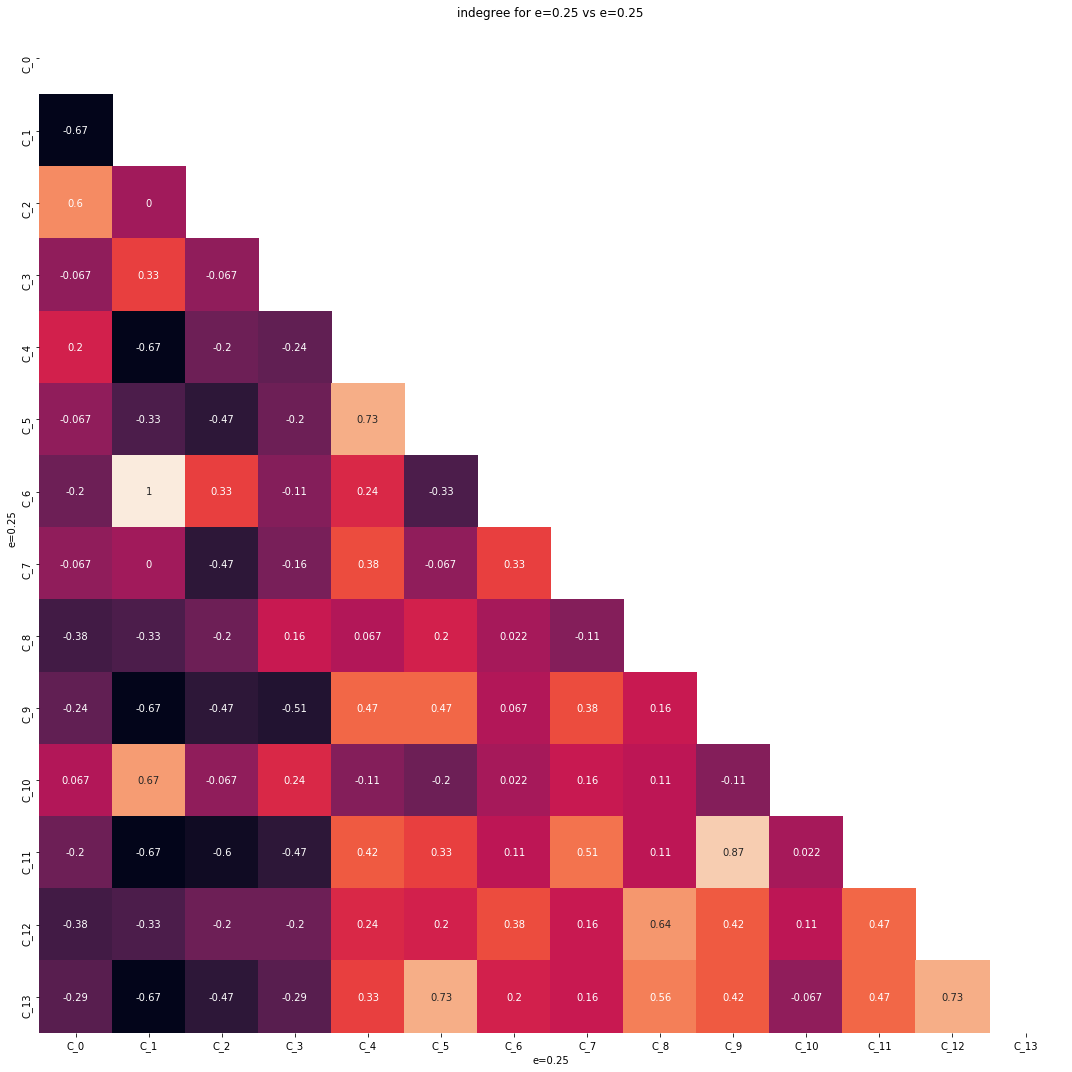

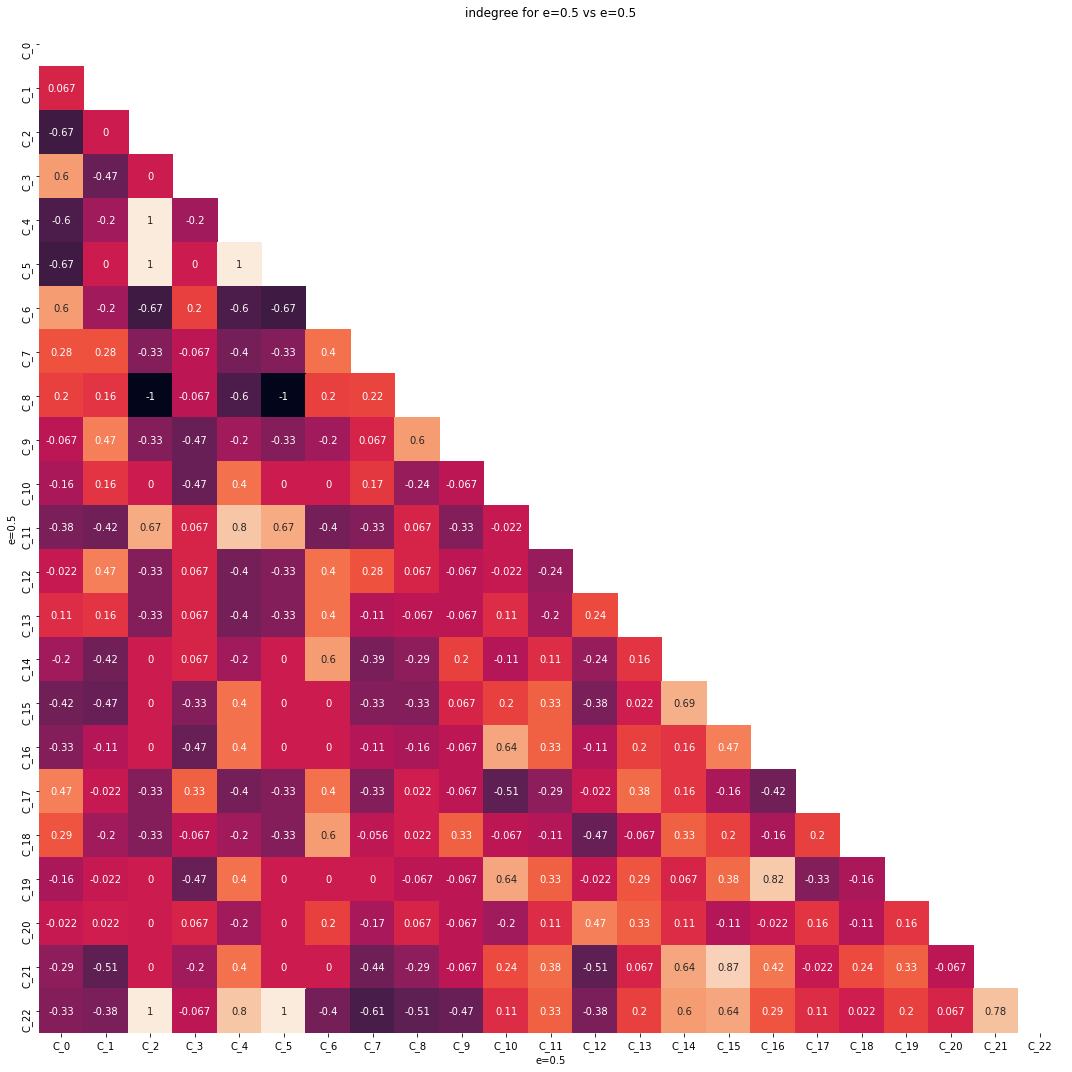

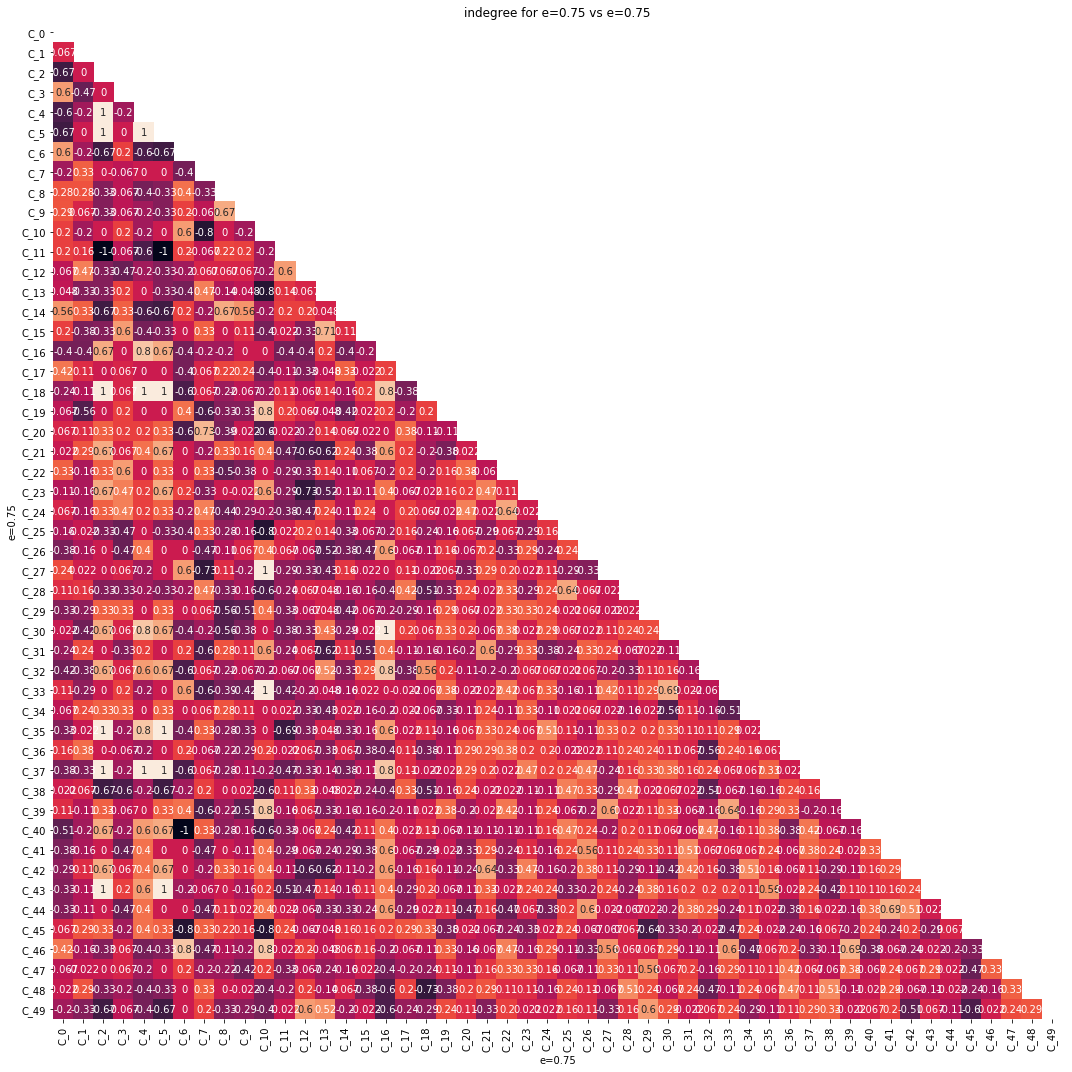

heatmaps for dataset kdd


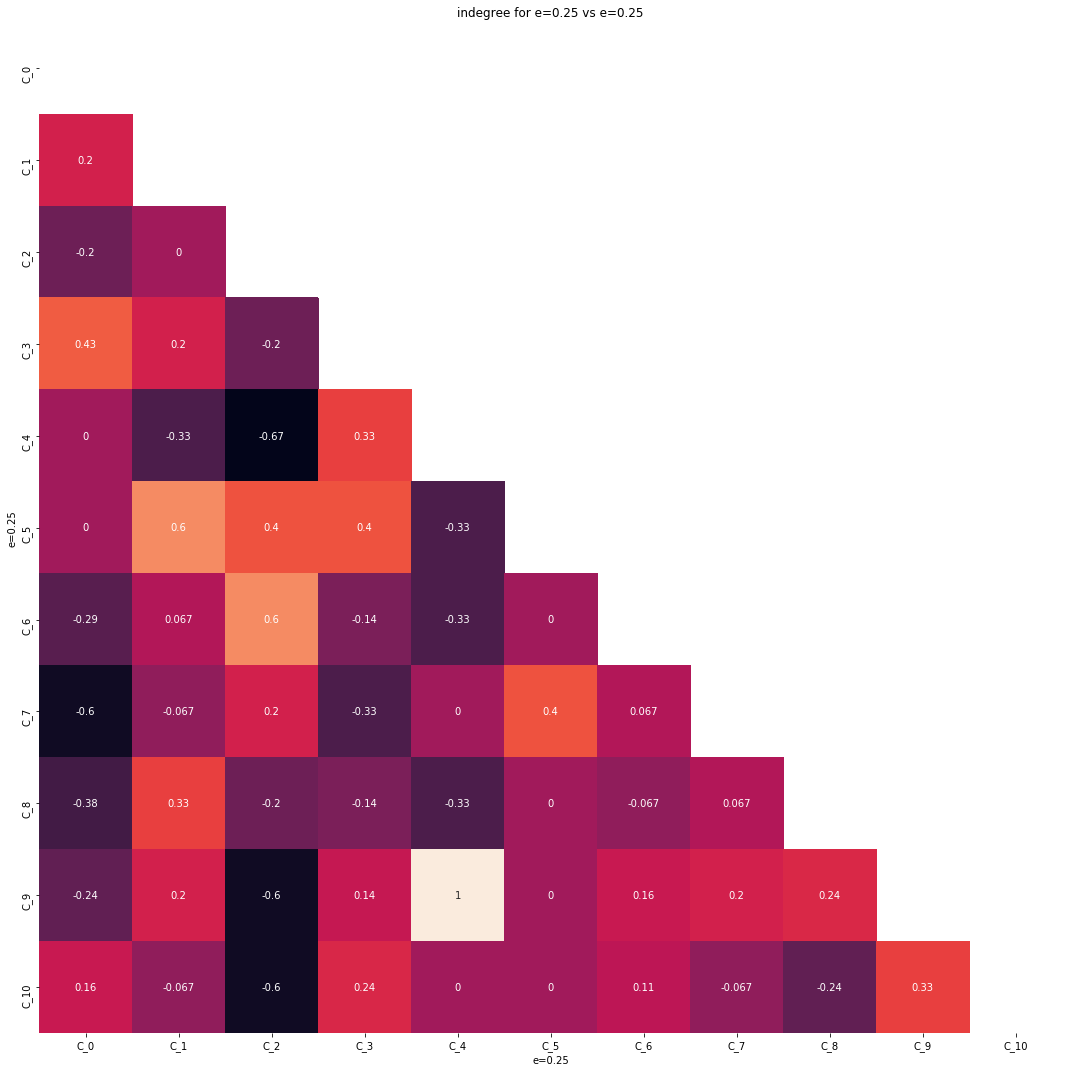

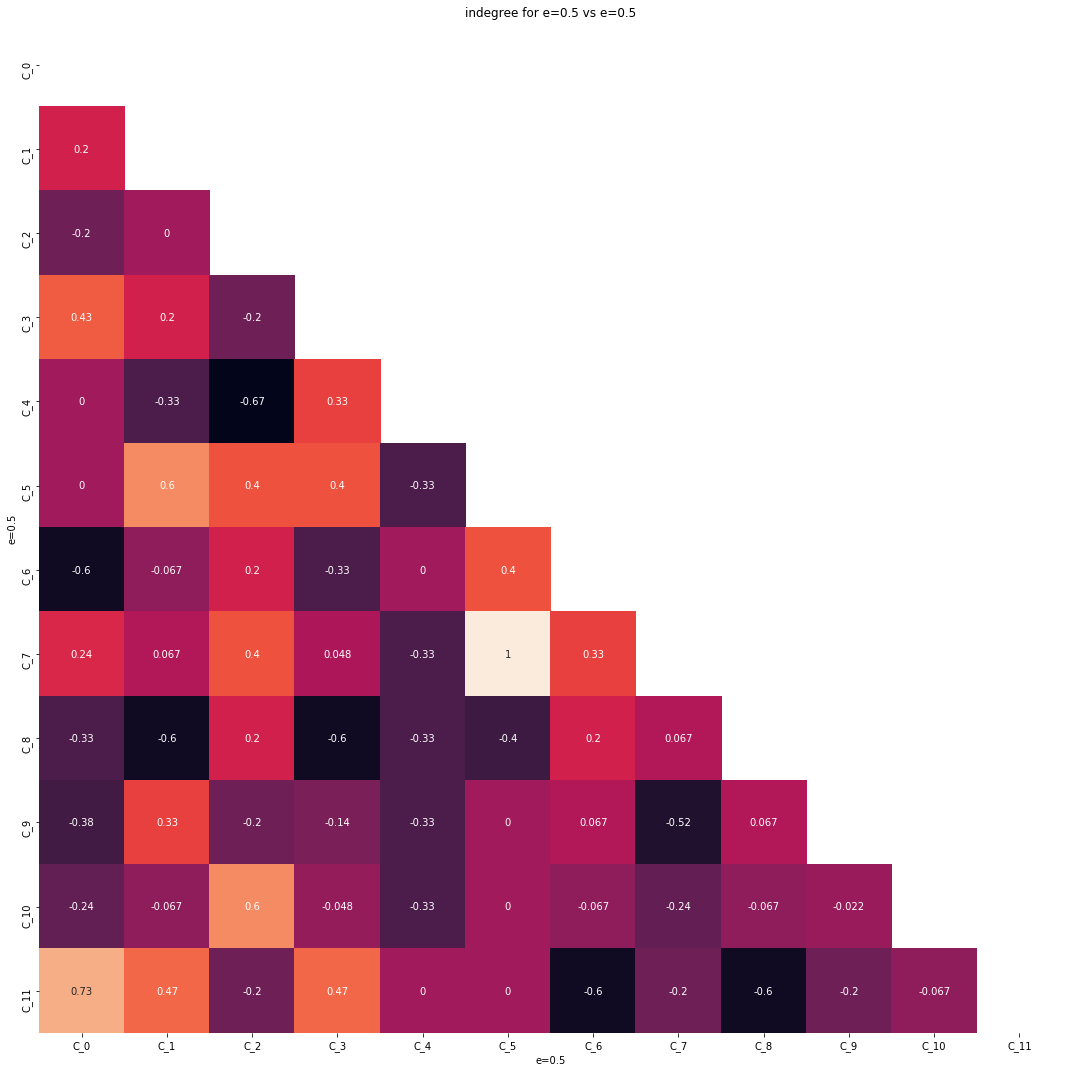

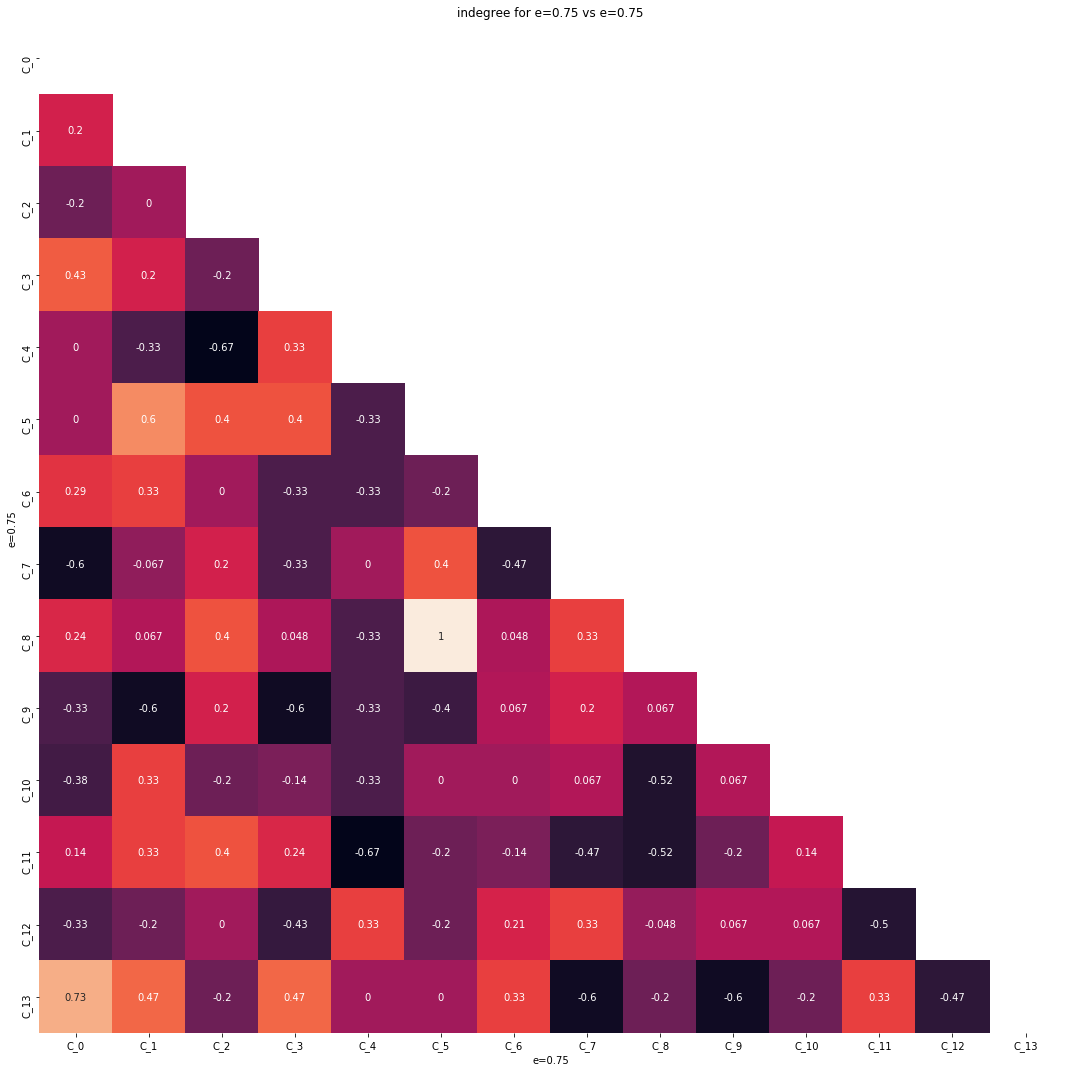

heatmaps for dataset pr


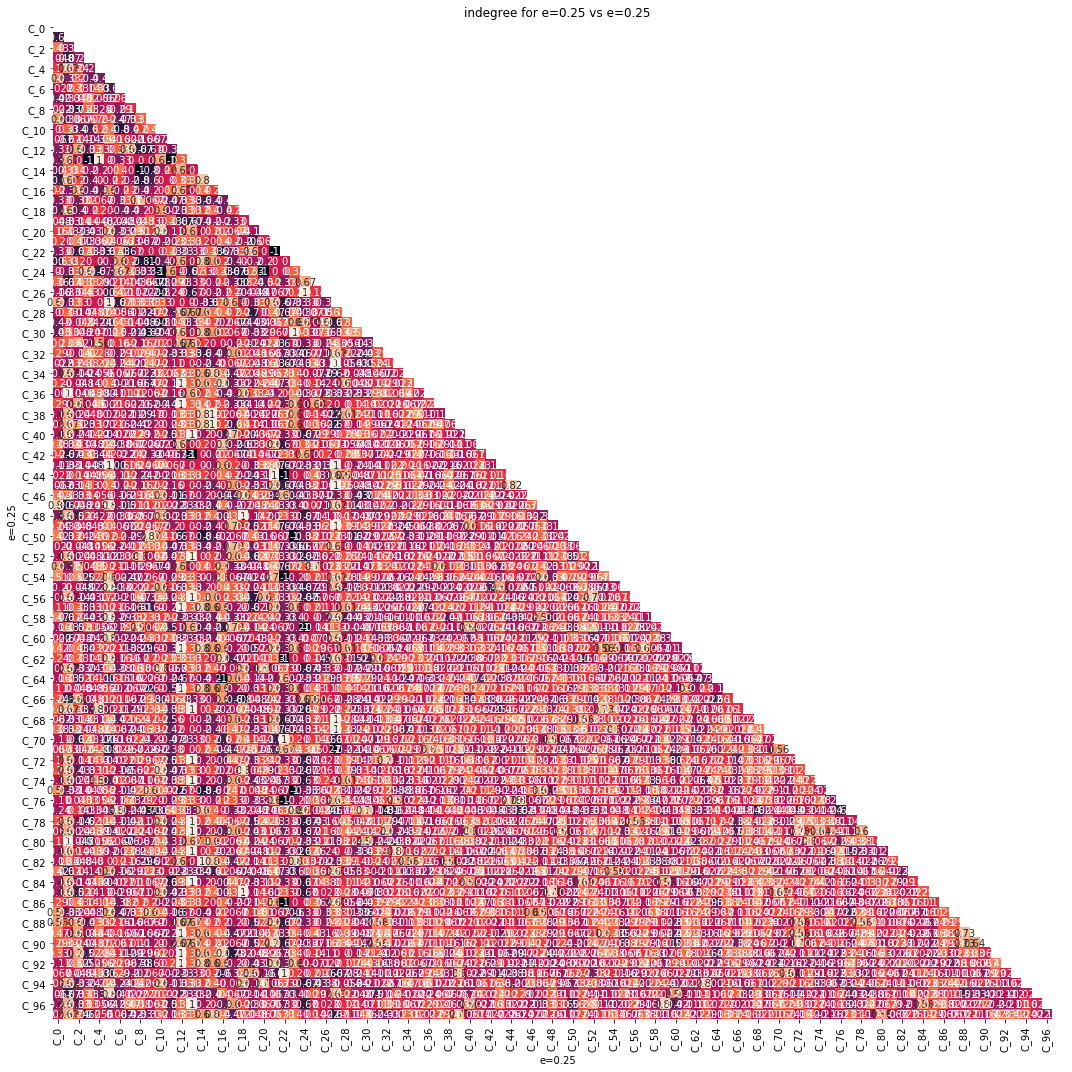

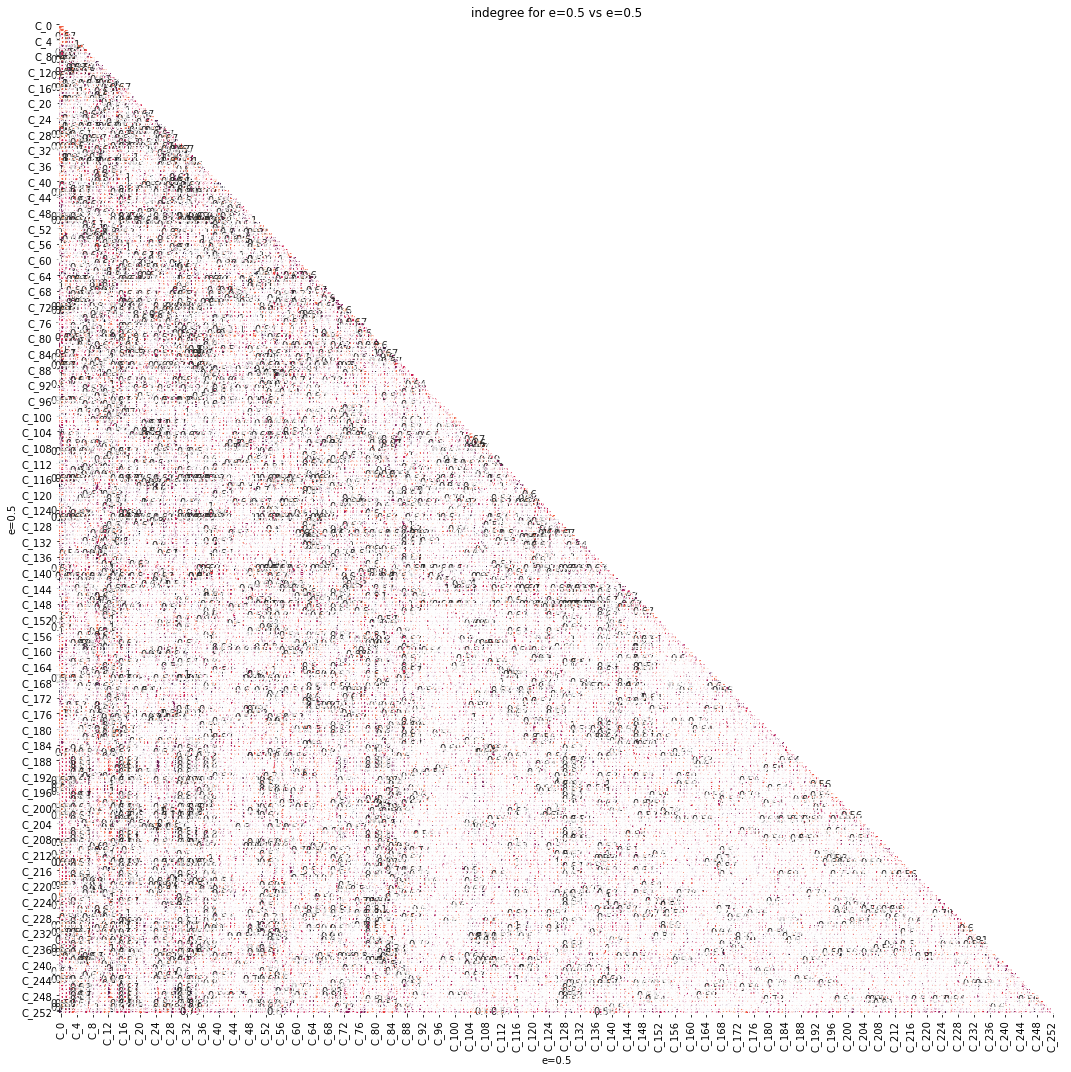

KeyboardInterrupt: 

In [13]:
for data_fn, m_list in m.items():
    print(f'heatmaps for dataset {data_fn}')
    Analysis.communities_top_users_heatmap(m_list, metric_name, e_pairs, triangular=True)

In [14]:
for data_fn, m_list in m.items():
    print(f'rankings for dataset {data_fn}')
    r_list = Analysis.communities_top_users_rank(m_list, metric_name, e_pairs, threshold=0.6)
    for r in r_list:
        display(r.round(2))

rankings for dataset ll


/home/flaprimo/twitter-network-analysis/venv/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


p1_e0.25 p2_e0.25  indegree
0      C_1      C_6      1.00
1     C_11      C_9      0.87
2     C_13      C_5      0.73
3     C_12     C_13      0.73
4      C_4      C_5      0.73
5      C_1     C_10      0.67
6     C_12      C_8      0.64
7      C_0      C_2      0.60

p1_e0.5 p2_e0.5  indegree
0     C_22     C_5      1.00
1      C_4     C_5      1.00
2      C_2    C_22      1.00
3      C_2     C_5      1.00
4      C_2     C_4      1.00
5     C_15    C_21      0.87
6     C_16    C_19      0.82
7     C_22     C_4      0.80
8     C_11     C_4      0.80
9     C_21    C_22      0.78
10    C_14    C_15      0.69
11    C_11     C_5      0.67
12    C_11     C_2      0.67
13    C_15    C_22      0.64
14    C_14    C_21      0.64
15    C_10    C_19      0.64
16    C_10    C_16      0.64
17    C_18     C_6      0.60
18    C_14    C_22      0.60
19    C_14     C_6      0.60
20     C_8     C_9      0.60
21     C_0     C_6      0.60
22     C_0     C_3      0.60

p1_e0.75 p2_e0.75  indegree
0      C_43      C_5      1.00
1      C_37      C_5      1.00
2      C_35      C_5      1.00
3      C_18      C_5      1.00
4      C_18      C_2      1.00
5       C_4      C_5      1.00
6       C_2     C_43      1.00
7       C_2     C_37      1.00
8       C_2     C_35      1.00
9       C_2      C_5      1.00
10      C_2      C_4      1.00
11     C_37      C_4      1.00
12     C_18      C_4      1.00
13     C_16     C_30      1.00
14     C_10     C_33      1.00
15     C_10     C_27      1.00
16     C_46      C_6      0.80
17     C_35      C_4      0.80
18     C_30      C_4      0.80
19     C_16     C_37      0.80
20     C_16     C_32      0.80
21     C_16     C_18      0.80
22     C_16      C_4      0.80
23     C_10     C_46      0.80
24     C_10     C_39      0.80
25     C_10     C_19      0.80
26     C_20      C_7      0.73
27     C_13     C_15      0.71
28     C_41     C_44      0.69
29     C_39     C_46      0.69
..      ...      ...       ...
46      C_8      C_9      0.67
47     C_33     C_39      0.64
48     C_25     C_28      0.64
49     C_22     C_24      0.64
50     C_21     C_42      0.64
51     C_33     C_46      0.60
52     C_33      C_6      0.60
53     C_32      C_4      0.60
54     C_29     C_49      0.60
55     C_27     C_39      0.60
56     C_27      C_6      0.60
57     C_26     C_44      0.60
58     C_22      C_3      0.60
59     C_21     C_31      0.60
60     C_16     C_44      0.60
61     C_16     C_42      0.60
62     C_16     C_41      0.60
63     C_16     C_35      0.60
64     C_16     C_26      0.60
65     C_16     C_21      0.60
66     C_15      C_3      0.60
67     C_12     C_49      0.60
68     C_11     C_12      0.60
69     C_10     C_31      0.60
70     C_10     C_23      0.60
71     C_10      C_6      0.60
72      C_4     C_43      0.60
73      C_4     C_40      0.60
74      C_0      C_6      0.60
75      C_0      C_3      0.60

[76 rows x 3 columns]

rankings for dataset kdd


p1_e0.25 p2_e0.25  indegree
0      C_4      C_9       1.0
1      C_2      C_6       0.6
2      C_1      C_5       0.6

p1_e0.5 p2_e0.5  indegree
0     C_5     C_7      1.00
1     C_0    C_11      0.73
2    C_10     C_2      0.60
3     C_1     C_5      0.60

p1_e0.75 p2_e0.75  indegree
0      C_5      C_8      1.00
1      C_0     C_13      0.73
2      C_1      C_5      0.60

rankings for dataset pr


p1_e0.25 p2_e0.25  indegree
0       C_27     C_69       1.0
1       C_27     C_68       1.0
2       C_27     C_49       1.0
3       C_27     C_45       1.0
4       C_27     C_43       1.0
5       C_27     C_33       1.0
6       C_27      C_5       1.0
7       C_24     C_26       1.0
8       C_22     C_93       1.0
9       C_22     C_70       1.0
10      C_13     C_96       1.0
11      C_13     C_84       1.0
12      C_13     C_81       1.0
13      C_13     C_79       1.0
14      C_13     C_78       1.0
15      C_13     C_74       1.0
16      C_13     C_72       1.0
17      C_13     C_67       1.0
18      C_13     C_56       1.0
19      C_13     C_52       1.0
20      C_13     C_40       1.0
21      C_13      C_4       1.0
22      C_12     C_92       1.0
23      C_12     C_91       1.0
24      C_12     C_89       1.0
25      C_12     C_65       1.0
26      C_12     C_61       1.0
27      C_12     C_57       1.0
28      C_12     C_37       1.0
29      C_12     C_35       1.0
..       ...      ...       ...
253     C_16      C_2       0.6
254     C_15     C_92       0.6
255     C_15     C_80       0.6
256     C_15     C_65       0.6
257     C_15     C_61       0.6
258     C_15     C_57       0.6
259     C_15     C_56       0.6
260     C_15     C_30       0.6
261     C_15     C_23       0.6
262     C_14     C_97       0.6
263     C_14     C_91       0.6
264     C_14     C_89       0.6
265     C_14     C_77       0.6
266     C_14     C_35       0.6
267     C_14     C_34       0.6
268     C_14     C_28       0.6
269     C_10     C_94       0.6
270     C_10     C_85       0.6
271     C_10     C_78       0.6
272     C_10     C_63       0.6
273     C_10     C_55       0.6
274     C_10     C_48       0.6
275     C_10     C_46       0.6
276     C_10     C_18       0.6
277      C_5     C_87       0.6
278      C_5     C_83       0.6
279      C_5     C_54       0.6
280      C_0     C_53       0.6
281      C_0      C_9       0.6
282      C_0      C_5       0.6

[283 rows x 3 columns]

p1_e0.5 p2_e0.5  indegree
0      C_250    C_50       1.0
1      C_249    C_71       1.0
2      C_248    C_71       1.0
3      C_247    C_71       1.0
4      C_246    C_71       1.0
5      C_244    C_50       1.0
6      C_243    C_29       1.0
7      C_240    C_55       1.0
8      C_239    C_65       1.0
9      C_238    C_29       1.0
10     C_237    C_50       1.0
11     C_235    C_71       1.0
12     C_234    C_84       1.0
13     C_232    C_50       1.0
14     C_231    C_32       1.0
15     C_231     C_5       1.0
16     C_230    C_50       1.0
17     C_229    C_71       1.0
18     C_227    C_32       1.0
19     C_227     C_5       1.0
20     C_224    C_71       1.0
21     C_221    C_29       1.0
22     C_219    C_29       1.0
23     C_218    C_65       1.0
24     C_217    C_71       1.0
25     C_215    C_71       1.0
26     C_214    C_50       1.0
27     C_210    C_53       1.0
28     C_209    C_50       1.0
29     C_208    C_71       1.0
...      ...     ...       ...
2312    C_16    C_24       0.6
2313    C_12   C_244       0.6
2314    C_12   C_240       0.6
2315    C_12   C_234       0.6
2316    C_12   C_232       0.6
2317    C_12   C_230       0.6
2318    C_12   C_205       0.6
2319    C_12   C_177       0.6
2320    C_12   C_138       0.6
2321    C_12   C_134       0.6
2322    C_12    C_79       0.6
2323    C_12    C_68       0.6
2324    C_12    C_16       0.6
2325    C_12     C_3       0.6
2326    C_10    C_63       0.6
2327    C_10    C_54       0.6
2328    C_10    C_38       0.6
2329     C_7    C_86       0.6
2330     C_6    C_99       0.6
2331     C_6    C_82       0.6
2332     C_6    C_81       0.6
2333     C_6    C_69       0.6
2334     C_4    C_91       0.6
2335     C_4     C_6       0.6
2336     C_3    C_68       0.6
2337     C_3    C_34       0.6
2338     C_3     C_7       0.6
2339     C_2    C_87       0.6
2340     C_2    C_34       0.6
2341     C_2    C_24       0.6

[2342 rows x 3 columns]

p1_e0.75 p2_e0.75  indegree
0        C_618     C_68       1.0
1        C_617     C_68       1.0
2        C_610     C_81       1.0
3        C_609     C_83       1.0
4        C_609     C_79       1.0
5        C_598     C_81       1.0
6        C_593     C_83       1.0
7        C_593     C_79       1.0
8        C_590     C_96       1.0
9        C_586     C_83       1.0
10       C_586     C_79       1.0
11       C_580     C_68       1.0
12       C_577     C_83       1.0
13       C_577     C_79       1.0
14       C_572     C_97       1.0
15       C_568     C_81       1.0
16       C_560     C_70       1.0
17       C_557     C_57       1.0
18       C_555     C_81       1.0
19       C_553     C_57       1.0
20       C_546     C_97       1.0
21       C_545     C_70       1.0
22       C_537     C_97       1.0
23       C_532     C_68       1.0
24       C_530     C_57       1.0
25       C_524    C_559       1.0
26       C_524      C_8       1.0
27       C_518     C_81       1.0
28       C_516    C_603       1.0
29       C_516    C_547       1.0
...        ...      ...       ...
13304      C_4    C_517       0.6
13305      C_4    C_513       0.6
13306      C_4    C_497       0.6
13307      C_4    C_488       0.6
13308      C_4    C_462       0.6
13309      C_4    C_457       0.6
13310      C_4    C_426       0.6
13311      C_4    C_414       0.6
13312      C_4    C_411       0.6
13313      C_4     C_93       0.6
13314      C_4     C_88       0.6
13315      C_4     C_65       0.6
13316      C_4     C_45       0.6
13317      C_3    C_453       0.6
13318      C_3     C_66       0.6
13319      C_3     C_64       0.6
13320      C_3      C_8       0.6
13321      C_2    C_355       0.6
13322      C_2    C_212       0.6
13323      C_2     C_74       0.6
13324      C_1    C_444       0.6
13325      C_1    C_360       0.6
13326      C_1    C_318       0.6
13327      C_1    C_306       0.6
13328      C_1    C_176       0.6
13329      C_1     C_32       0.6
13330      C_0    C_385       0.6
13331      C_0    C_245       0.6
13332      C_0     C_24       0.6
13333      C_0     C_15       0.6

[13334 rows x 3 columns]

#### Similarities between DIFFERENT epsilon settings
Epsilon parameter defines the likeliness of creating new communities.

Thus the most important partitions will likely "survive" with different epsilon settings.

Since we are comparing different partitions the heatmap is not triangular as before.

In [ ]:
for data_fn, m_list in m.items():
    print(f'heatmaps for dataset {data_fn}')
    Analysis.communities_top_users_heatmap(m_list, metric_name, e_pairwise_combs)

In [15]:
for data_fn in data_filenames:
    print(f'rankings for dataset {data_fn}')
    r_list = Analysis.communities_top_users_rank(m[data_fn], metric_name, e_pairwise_combs, threshold=0.6)
    for r in r_list:
        display(r.round(2))

rankings for dataset ll


/home/flaprimo/twitter-network-analysis/venv/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


p1_e0.75 p2_e0.5  indegree
0      C_22     C_5      1.00
1       C_4     C_5      1.00
2       C_2     C_5      1.00
3       C_2     C_4      1.00
4      C_11    C_16      1.00
5      C_22     C_4      0.80
6      C_11     C_4      0.80
7      C_10    C_21      0.69
8      C_11     C_5      0.67
9      C_11     C_2      0.67
10      C_2    C_21      0.67
11     C_18     C_6      0.60
12     C_15    C_16      0.60
13     C_14     C_6      0.60
14     C_10    C_16      0.60
15      C_0     C_6      0.60
16      C_0     C_3      0.60

p1_e0.75 p2_e0.25  indegree
0     C_12      C_7      0.87
1      C_0      C_6      0.60

p1_e0.5 p2_e0.25  indegree
0     C_5      C_9      1.00
1     C_4      C_9      0.73
2    C_10      C_5      0.67
3    C_10      C_2      0.67
4     C_0      C_6      0.60

rankings for dataset kdd


p1_e0.75 p2_e0.5  indegree
0      C_7     C_8       1.0
1      C_8     C_9       1.0
2      C_5     C_8       1.0
3     C_10     C_2       0.6
4      C_1     C_5       0.6

p1_e0.75 p2_e0.25  indegree
0      C_5      C_8       1.0
1      C_1      C_5       0.6

p1_e0.5 p2_e0.25  indegree
0     C_5      C_7       1.0
1     C_1      C_5       0.6

rankings for dataset pr


p1_e0.75 p2_e0.5  indegree
0       C_243    C_53       1.0
1       C_242    C_68       1.0
2       C_240    C_48       1.0
3       C_240    C_43       1.0
4       C_239    C_57       1.0
5       C_238    C_53       1.0
6       C_236    C_68       1.0
7       C_234   C_235       1.0
8       C_231    C_97       1.0
9       C_231    C_40       1.0
10      C_227    C_97       1.0
11      C_227    C_40       1.0
12      C_225    C_68       1.0
13      C_223    C_68       1.0
14      C_221    C_53       1.0
15      C_219    C_53       1.0
16      C_218    C_57       1.0
17      C_214   C_225       1.0
18      C_212    C_68       1.0
19      C_210   C_233       1.0
20      C_209   C_225       1.0
21      C_205    C_38       1.0
22      C_204   C_237       1.0
23      C_204    C_48       1.0
24      C_204    C_43       1.0
25      C_202   C_225       1.0
26      C_201    C_83       1.0
27      C_201    C_79       1.0
28      C_200   C_225       1.0
29      C_199   C_200       1.0
...       ...     ...       ...
2524     C_12   C_167       0.6
2525     C_12   C_162       0.6
2526     C_12   C_149       0.6
2527     C_12   C_143       0.6
2528     C_12   C_133       0.6
2529     C_12   C_125       0.6
2530     C_12    C_94       0.6
2531     C_12    C_85       0.6
2532     C_12    C_80       0.6
2533     C_12    C_72       0.6
2534     C_12    C_69       0.6
2535     C_12    C_63       0.6
2536     C_12    C_54       0.6
2537     C_12    C_37       0.6
2538     C_12     C_7       0.6
2539     C_10   C_236       0.6
2540     C_10   C_181       0.6
2541     C_10   C_176       0.6
2542     C_10   C_111       0.6
2543      C_7    C_94       0.6
2544      C_6    C_99       0.6
2545      C_6    C_88       0.6
2546      C_6    C_87       0.6
2547      C_6    C_65       0.6
2548      C_6     C_9       0.6
2549      C_4    C_41       0.6
2550      C_3    C_61       0.6
2551      C_3    C_58       0.6
2552      C_3    C_44       0.6
2553      C_2   C_230       0.6

[2554 rows x 3 columns]

p1_e0.75 p2_e0.25  indegree
0       C_90     C_97       1.0
1       C_88     C_97       1.0
2       C_80     C_83       1.0
3       C_55     C_68       1.0
4       C_51     C_68       1.0
5       C_46     C_53       1.0
6       C_42     C_81       1.0
7       C_37     C_57       1.0
8       C_36     C_83       1.0
9       C_36     C_79       1.0
10      C_35     C_57       1.0
11      C_32     C_68       1.0
12      C_31     C_97       1.0
13      C_31     C_40       1.0
14      C_28     C_97       1.0
15      C_28     C_40       1.0
16      C_26     C_96       1.0
17      C_26     C_30       1.0
18      C_24     C_96       1.0
19      C_24     C_86       1.0
20      C_24     C_30       1.0
21      C_24      C_4       1.0
22      C_22     C_85       1.0
23      C_22     C_38       1.0
24      C_17     C_68       1.0
25      C_13     C_78       1.0
26      C_13     C_73       1.0
27      C_13     C_71       1.0
28      C_13     C_69       1.0
29      C_12     C_57       1.0
..       ...      ...       ...
403     C_16     C_41       0.6
404     C_16      C_5       0.6
405     C_15     C_55       0.6
406     C_15     C_36       0.6
407     C_14     C_94       0.6
408     C_14     C_80       0.6
409     C_14     C_72       0.6
410     C_14     C_63       0.6
411     C_14     C_60       0.6
412     C_14     C_58       0.6
413     C_14     C_37       0.6
414     C_11     C_82       0.6
415     C_11     C_32       0.6
416     C_11     C_15       0.6
417     C_11      C_8       0.6
418     C_10     C_89       0.6
419     C_10     C_78       0.6
420     C_10     C_75       0.6
421     C_10     C_73       0.6
422     C_10     C_71       0.6
423     C_10     C_69       0.6
424     C_10     C_54       0.6
425      C_5     C_91       0.6
426      C_5     C_56       0.6
427      C_5     C_51       0.6
428      C_4     C_78       0.6
429      C_4     C_61       0.6
430      C_3     C_66       0.6
431      C_2     C_25       0.6
432      C_2      C_9       0.6

[433 rows x 3 columns]

p1_e0.5 p2_e0.25  indegree
0      C_83     C_89       1.0
1      C_62     C_71       1.0
2      C_61     C_65       1.0
3      C_60     C_89       1.0
4      C_58     C_89       1.0
5      C_57     C_65       1.0
6      C_54     C_71       1.0
7      C_47     C_89       1.0
8      C_44     C_71       1.0
9      C_40     C_50       1.0
10     C_39     C_84       1.0
11     C_38     C_84       1.0
12     C_37     C_65       1.0
13     C_35     C_65       1.0
14     C_34     C_84       1.0
15     C_31     C_32       1.0
16     C_31      C_5       1.0
17     C_28     C_32       1.0
18     C_28      C_5       1.0
19     C_27     C_38       1.0
20     C_22     C_27       1.0
21     C_21     C_71       1.0
22     C_20     C_53       1.0
23     C_19     C_88       1.0
24     C_19     C_75       1.0
25     C_19     C_59       1.0
26     C_19     C_23       1.0
27     C_15     C_84       1.0
28     C_13     C_96       1.0
29     C_13     C_50       1.0
..      ...      ...       ...
427    C_15     C_86       0.6
428    C_15     C_20       0.6
429    C_14     C_79       0.6
430    C_14     C_70       0.6
431    C_14     C_44       0.6
432    C_14     C_42       0.6
433    C_14     C_39       0.6
434    C_14     C_30       0.6
435    C_14      C_3       0.6
436    C_11     C_46       0.6
437    C_10     C_87       0.6
438    C_10     C_49       0.6
439    C_10     C_37       0.6
440    C_10     C_24       0.6
441    C_10     C_16       0.6
442     C_9     C_97       0.6
443     C_9     C_94       0.6
444     C_9     C_92       0.6
445     C_5     C_97       0.6
446     C_5     C_94       0.6
447     C_5     C_92       0.6
448     C_5     C_90       0.6
449     C_5     C_82       0.6
450     C_5     C_81       0.6
451     C_5     C_58       0.6
452     C_3     C_51       0.6
453     C_2     C_82       0.6
454     C_0     C_63       0.6
455     C_0     C_54       0.6
456     C_0     C_38       0.6

[457 rows x 3 columns]

## Comparisons
Compare DEMON community results with other community detection algorithms.

Find similarities between partitions found by different community detection algorithms with a heatmap and then list the most correlated communities.

In [ ]:
for data_fn, m_list in m.items():
    print(f'heatmaps for dataset {data_fn}')
    c = Comparisons.get_comparison_top_community(m_list[epsilon[0]])
    Comparisons.communities_top_users_heatmap(m_list, c, metric_name)

In [23]:
for data_fn, m_list in m.items():
    print(f'rankings for dataset {data_fn}')
    c = Comparisons.get_comparison_top_community(m_list[epsilon[0]])
    r_list = Comparisons.communities_top_users_rank(m_list, c, metric_name, 0.6)
    for r in r_list:
        display(r.round(2))

rankings for dataset ll


/home/flaprimo/twitter-network-analysis/venv/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Empty DataFrame
Columns: [DEMON e=0.25, other algorithm, indegree]
Index: []

DEMON e=0.5 other algorithm  indegree
0         C_3             C_6      0.67

DEMON e=0.75 other algorithm  indegree
0         C_17             C_6      1.00
1         C_12             C_6      0.67
2          C_3             C_6      0.67
3         C_10            C_12      0.60

rankings for dataset kdd


DEMON e=0.25 other algorithm  indegree
0          C_1             C_7      0.80
1          C_4             C_5      0.67
2          C_2             C_8      0.67
3          C_5             C_9      0.61

DEMON e=0.5 other algorithm  indegree
0        C_11             C_4      1.00
1         C_1             C_6      0.80
2         C_4             C_5      0.67
3         C_2             C_9      0.67

DEMON e=0.75 other algorithm  indegree
0         C_10             C_4      1.00
1          C_7             C_8      1.00
2          C_1             C_7      0.80
3          C_4             C_5      0.67

rankings for dataset pr


DEMON e=0.25 other algorithm  indegree
0          C_25            C_27      1.00
1          C_20            C_24      1.00
2          C_19            C_24      1.00
3          C_18            C_27      1.00
4          C_15            C_27      1.00
5          C_14            C_27      1.00
6          C_12            C_22      1.00
7          C_11            C_24      1.00
8          C_10            C_24      1.00
9           C_2            C_24      1.00
10          C_0            C_13      1.00
11          C_0             C_1      1.00
12         C_18             C_3      0.87
13         C_60            C_70      0.83
14         C_34            C_71      0.83
15         C_52             C_9      0.80
16         C_11            C_21      0.80
17          C_7             C_9      0.80
18         C_16            C_96      0.78
19         C_11            C_29      0.73
20          C_1            C_19      0.73
21         C_34            C_36      0.72
22          C_6            C_78      0.72
23          C_1            C_87      0.72
24         C_46             C_5      0.67
25         C_25             C_5      0.67
26         C_20             C_5      0.67
27         C_13            C_23      0.67
28         C_13            C_14      0.67
29         C_12            C_18      0.67
..          ...             ...       ...
58         C_60            C_96      0.61
59         C_60            C_85      0.61
60         C_60            C_68      0.61
61         C_59            C_96      0.61
62         C_43            C_76      0.61
63         C_41            C_78      0.61
64         C_36            C_76      0.61
65         C_36            C_44      0.61
66         C_21            C_46      0.61
67         C_15            C_83      0.61
68         C_13             C_6      0.61
69         C_12            C_20      0.61
70         C_11            C_57      0.61
71         C_11            C_45      0.61
72          C_8            C_80      0.61
73          C_6            C_64      0.61
74          C_5            C_68      0.61
75          C_3            C_94      0.61
76          C_0            C_81      0.61
77          C_0            C_71      0.61
78         C_77             C_9      0.60
79         C_76            C_77      0.60
80         C_56             C_9      0.60
81         C_33             C_9      0.60
82         C_24             C_9      0.60
83         C_19             C_3      0.60
84         C_18             C_9      0.60
85         C_14            C_17      0.60
86         C_10            C_21      0.60
87          C_2            C_21      0.60

[88 rows x 3 columns]

DEMON e=0.5 other algorithm  indegree
0         C_105            C_82       1.0
1         C_105            C_71       1.0
2         C_104            C_75       1.0
3         C_104            C_59       1.0
4         C_104            C_41       1.0
5         C_104            C_23       1.0
6         C_104            C_13       1.0
7         C_104             C_8       1.0
8         C_102            C_84       1.0
9         C_102            C_55       1.0
10        C_102            C_50       1.0
11        C_102            C_35       1.0
12        C_102            C_26       1.0
13        C_102            C_15       1.0
14        C_102            C_12       1.0
15        C_100            C_71       1.0
16        C_100             C_6       1.0
17         C_83            C_89       1.0
18         C_79            C_89       1.0
19         C_77            C_89       1.0
20         C_75            C_89       1.0
21         C_74            C_84       1.0
22         C_71            C_75       1.0
23         C_71             C_8       1.0
24         C_70            C_87       1.0
25         C_70             C_9       1.0
26         C_68            C_75       1.0
27         C_68             C_8       1.0
28         C_66            C_84       1.0
29         C_65            C_82       1.0
..          ...             ...       ...
405        C_27            C_61       0.6
406        C_26            C_72       0.6
407        C_24            C_54       0.6
408        C_24            C_51       0.6
409        C_23             C_7       0.6
410        C_22            C_72       0.6
411        C_22            C_37       0.6
412        C_22            C_25       0.6
413        C_19            C_69       0.6
414        C_19            C_61       0.6
415        C_19            C_21       0.6
416        C_18            C_54       0.6
417        C_18            C_51       0.6
418        C_16            C_72       0.6
419        C_16            C_49       0.6
420        C_16            C_37       0.6
421        C_16            C_25       0.6
422        C_14            C_85       0.6
423        C_13            C_61       0.6
424        C_12            C_49       0.6
425        C_12            C_37       0.6
426        C_11            C_61       0.6
427        C_11            C_25       0.6
428        C_10            C_91       0.6
429         C_6            C_72       0.6
430         C_5            C_85       0.6
431         C_3            C_49       0.6
432         C_3            C_37       0.6
433         C_0            C_72       0.6
434         C_0            C_66       0.6

[435 rows x 3 columns]

DEMON e=0.75 other algorithm  indegree
0          C_106            C_97       1.0
1          C_106            C_57       1.0
2          C_106            C_40       1.0
3          C_106            C_25       1.0
4          C_105            C_96       1.0
5          C_105            C_30       1.0
6          C_105            C_15       1.0
7          C_103            C_83       1.0
8          C_103            C_79       1.0
9          C_103            C_58       1.0
10         C_103            C_48       1.0
11         C_103            C_43       1.0
12         C_103            C_20       1.0
13         C_102            C_83       1.0
14         C_102            C_79       1.0
15         C_102            C_58       1.0
16         C_102            C_48       1.0
17         C_102            C_43       1.0
18         C_102            C_20       1.0
19         C_101            C_97       1.0
20         C_101            C_57       1.0
21         C_101            C_40       1.0
22         C_101            C_29       1.0
23         C_100            C_96       1.0
24         C_100            C_41       1.0
25         C_100            C_30       1.0
26          C_96            C_97       1.0
27          C_95            C_96       1.0
28          C_88            C_97       1.0
29          C_79            C_81       1.0
..           ...             ...       ...
424         C_23            C_69       0.6
425         C_23            C_44       0.6
426         C_22            C_88       0.6
427         C_22            C_33       0.6
428         C_21            C_72       0.6
429         C_21            C_69       0.6
430         C_20            C_49       0.6
431         C_20            C_28       0.6
432         C_19            C_65       0.6
433         C_19            C_28       0.6
434         C_19             C_9       0.6
435         C_17            C_61       0.6
436         C_17            C_19       0.6
437         C_16            C_88       0.6
438         C_16            C_33       0.6
439         C_15             C_9       0.6
440         C_14            C_16       0.6
441         C_14             C_5       0.6
442         C_13            C_72       0.6
443         C_13             C_7       0.6
444         C_11            C_88       0.6
445         C_11            C_65       0.6
446         C_11            C_49       0.6
447         C_11            C_33       0.6
448         C_10            C_11       0.6
449          C_2            C_98       0.6
450          C_2            C_64       0.6
451          C_2             C_5       0.6
452          C_0           C_105       0.6
453          C_0            C_72       0.6

[454 rows x 3 columns]